In [214]:
import matplotlib.pyplot as plt

In [215]:
# !wget https://raw.githubusercontent.com/anilyesilkaya/cepGPT/refs/heads/main/data/nutuk_veri_seti/nutuk.txt

In [216]:
with open("nutuk.txt", "r", encoding="utf-8") as f:
    text = f.read()
print(text[0:500])

NUTUK

Mustafa Kemal ATATÜRK

Samsun’a Çıktığım Gün Genel Durum ve Görünüş
1919 yılı Mayısının Ondokuzuncu Günü Samsun’a Çıktım. Ülkenin Genel Durumu ve Görünüşü Şöyleydi: Osmanlı Devleti’nin içinde bulunduğu grup, I. Dünya Savaşı‘nda yenilmiş, Osmanlı Ordusu her tarafta zedelenmiş, şartları ağır bir ateşkes anlaşması imzalanmış, Büyük Savaş’ın uzun yılları boyunca millet yorgun ve fakir bir durumda. Milleti ve memleketi I. Dünya Savaşı‘na sürükleyenler, kendi hayatlarını kurtarma kaygısına düşe


In [217]:
# Characters dictionary
chars = sorted(set(list(text)))
print("".join(chars))
print(f"\nVocabulary length: {len(chars)}")


 !%(),-./0123456789:;?ABCDEFGHIJKLMNOPRSTUVWXYZabcdefghijklmnopqrstuvwxyz ÂÇÖÜâçéîöûüĞğİıŞş‘’“”

Vocabulary length: 96


In [218]:
# Character histogram
char_freq = {}
for c in text:
    if c not in char_freq.keys():
        char_freq[c] = 1
    else:
        char_freq[c] += 1

In [219]:
char_freq

{'N': 685,
 'U': 98,
 'T': 1735,
 'K': 3363,
 '\n': 5012,
 'M': 3451,
 'u': 39803,
 's': 28686,
 't': 40082,
 'a': 116352,
 'f': 6511,
 ' ': 160853,
 'e': 111150,
 'm': 41249,
 'l': 76003,
 'A': 2480,
 'Ü': 101,
 'R': 992,
 'S': 1774,
 'n': 77417,
 '’': 7155,
 'Ç': 303,
 'ı': 47030,
 'k': 45186,
 'ğ': 11050,
 'G': 954,
 'ü': 18950,
 'D': 1116,
 'r': 72712,
 'v': 15307,
 'ö': 7415,
 'ş': 19627,
 '1': 1919,
 '9': 1127,
 'y': 28915,
 'O': 878,
 'd': 45601,
 'o': 19852,
 'z': 15418,
 'c': 9692,
 '.': 10924,
 'i': 95535,
 'Ş': 367,
 ':': 1042,
 'ç': 8040,
 'b': 23962,
 'g': 13694,
 'p': 5532,
 ',': 14165,
 'I': 59,
 '‘': 655,
 'h': 10065,
 'B': 6058,
 'H': 2371,
 'â': 3074,
 'V': 424,
 'F': 782,
 'P': 1956,
 'û': 944,
 'Y': 947,
 'İ': 2544,
 ';': 342,
 'î': 1606,
 'j': 122,
 '5': 246,
 'Ö': 180,
 '-': 1200,
 'E': 2097,
 'Z': 192,
 'C': 992,
 '4': 237,
 '/': 99,
 '(': 250,
 '2': 1231,
 ')': 323,
 '3': 434,
 'L': 150,
 'Â': 33,
 'w': 25,
 '7': 155,
 '0': 535,
 '6': 137,
 '“': 1255,
 '”': 1237

In [220]:
def calculate_freq(d, sort=True, norm=True, replace_space=True):
    # Calculates relative frequencies for an unsorted dict
    if sort:
        d = dict(sorted(d.items(), key = lambda item:item[1], reverse=True))
    if replace_space:
        keys = [key if key !=" " else "<SPC>" for key in d.keys()]
    else:
        keys = [k for k in d.keys()]
    if norm:
        vals = [100*val/sum(d.values()) for val in d.values()]
    else:
        vals = [val for val in d.values()]
    return (d, keys, vals)

In [221]:
# Sorted char frequencies
(sorted_char_freq, hist_chars, hist_freqs) = calculate_freq(char_freq)
sorted_char_freq

{' ': 160853,
 'a': 116352,
 'e': 111150,
 'i': 95535,
 'n': 77417,
 'l': 76003,
 'r': 72712,
 'ı': 47030,
 'd': 45601,
 'k': 45186,
 'm': 41249,
 't': 40082,
 'u': 39803,
 'y': 28915,
 's': 28686,
 'b': 23962,
 'o': 19852,
 'ş': 19627,
 'ü': 18950,
 'z': 15418,
 'v': 15307,
 ',': 14165,
 'g': 13694,
 'ğ': 11050,
 '.': 10924,
 'h': 10065,
 'c': 9692,
 'ç': 8040,
 'ö': 7415,
 '’': 7155,
 'f': 6511,
 'B': 6058,
 'p': 5532,
 '\n': 5012,
 'M': 3451,
 'K': 3363,
 'â': 3074,
 'İ': 2544,
 'A': 2480,
 'H': 2371,
 'E': 2097,
 'P': 1956,
 '1': 1919,
 'S': 1774,
 'T': 1735,
 'î': 1606,
 '“': 1255,
 '”': 1237,
 '2': 1231,
 '-': 1200,
 '9': 1127,
 'D': 1116,
 ':': 1042,
 'R': 992,
 'C': 992,
 'G': 954,
 'Y': 947,
 'û': 944,
 'O': 878,
 'F': 782,
 'N': 685,
 '‘': 655,
 '0': 535,
 '?': 441,
 '3': 434,
 'V': 424,
 'Ş': 367,
 ';': 342,
 ')': 323,
 'Ç': 303,
 '(': 250,
 '5': 246,
 '4': 237,
 'Z': 192,
 '8': 184,
 'Ö': 180,
 '!': 171,
 '7': 155,
 'L': 150,
 '6': 137,
 'j': 122,
 'Ü': 101,
 '/': 99,
 'U':

In [222]:
def hist_Nitems(items, values, N=20, x_angle=0):
    plt.figure(figsize=(10, 7))
    if N < 0:
        plt.bar(items, values)
    else:
        plt.bar(items[:N],values[:N])
    plt.ylabel("Relative Frequency (%)")
    plt.xticks(rotation=x_angle)
    plt.grid(True, axis='y', alpha=0.5)
    plt.show()

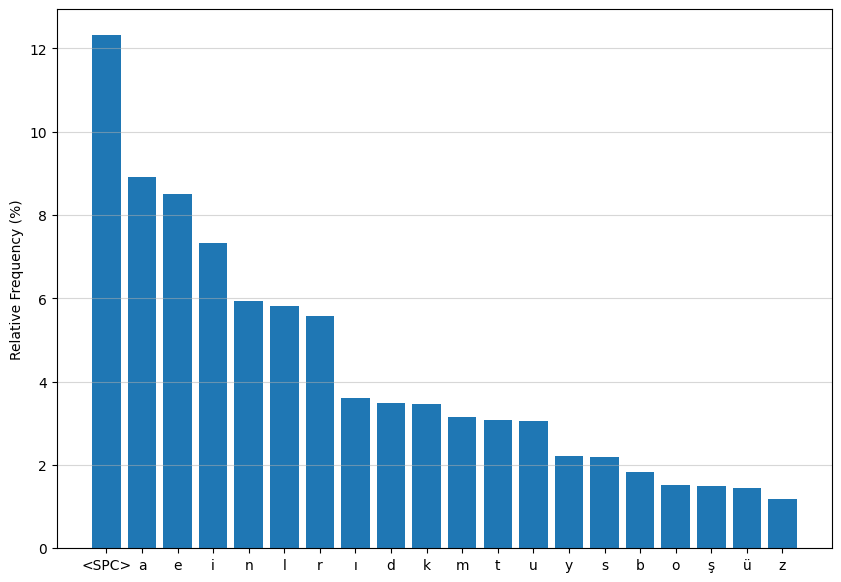

In [223]:
hist_Nitems(hist_chars, hist_freqs)

## Word-level Tokenization

In [224]:
import re
clean_text = re.sub(r"\n{1,}", " ", text)
proc_text = re.split(r"\s+", clean_text)

In [225]:
# TOKEN_PATTERN = re.compile(r"[A-Za-zÇĞİÖŞÜçğıöşü]+|'[a-zçğıöşü]+|[^\w\s]", re.UNICODE)
words = {}
for w in proc_text:
    w = w.lower()
    if w in words.keys():
        words[w] += 1
    else:
        words[w] = 1

In [226]:
(sorted_words, w, w_f) = calculate_freq(words, replace_space=False)
sorted_words

{'ve': 6525,
 'bir': 3909,
 'bu': 2800,
 'de': 927,
 'ile': 905,
 'da': 840,
 'için': 766,
 'olan': 749,
 'olarak': 670,
 'millî': 626,
 'efendiler,': 622,
 'bütün': 583,
 'daha': 549,
 'kadar': 541,
 'paşa': 539,
 'büyük': 444,
 'gibi': 440,
 'her': 434,
 'o': 393,
 'karşı': 392,
 'olduğu': 389,
 'ne': 385,
 'bey': 379,
 'ki,': 378,
 'sonra,': 376,
 'kabul': 373,
 'bey,': 370,
 'bulunan': 366,
 'millet': 360,
 'söz': 358,
 'bey’in': 349,
 'rauf': 332,
 'sonra': 331,
 'paşa’nın': 327,
 'paşa,': 315,
 'bazı': 302,
 'en': 287,
 'şu': 268,
 'çok': 267,
 'ilgili': 265,
 'tarafından': 258,
 'milletin': 256,
 'olduğunu': 249,
 'için,': 243,
 'hükûmet': 234,
 'şekilde': 232,
 'uygun': 231,
 'pek': 231,
 'komutanı': 227,
 'bundan': 225,
 'iki': 222,
 'genel': 217,
 'i̇stanbul': 217,
 'son': 208,
 'i̇smet': 206,
 'ali': 205,
 'kolordu': 205,
 'başka': 204,
 'kendi': 203,
 'önce': 203,
 'içinde': 202,
 'yeni': 201,
 'üzere': 199,
 'aynı': 192,
 'böyle': 192,
 'kemal': 190,
 'yüksek': 188,
 'bunu

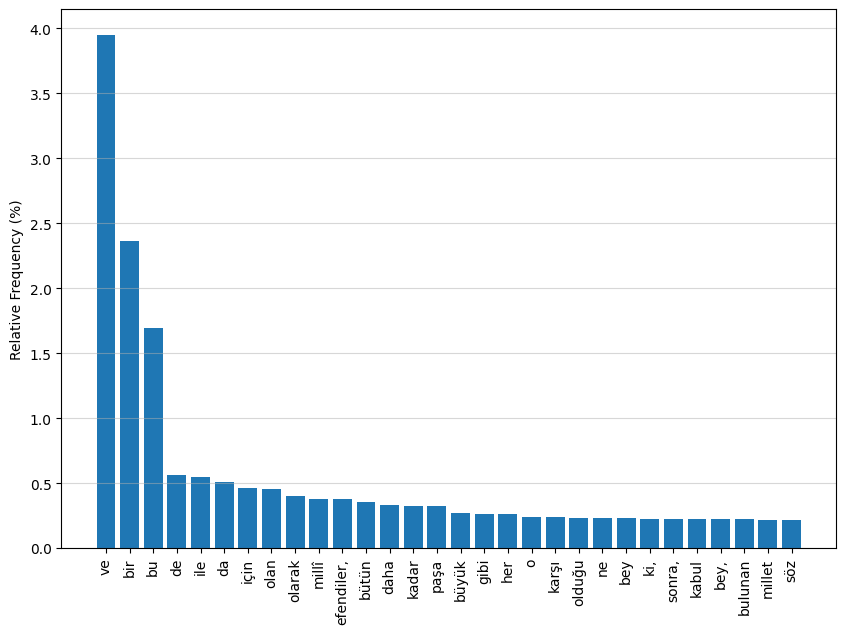

In [229]:
hist_Nitems(w, w_f, N=30, x_angle=90)

[3.948873436336898,
 2.3656929138147027,
 1.6945357274702397,
 0.5610123640588972,
 0.5476981547716311,
 0.5083607182410719,
 0.46357655972935846,
 0.4532883070982891,
 0.40547819193037876,
 0.37884977335584646,
 0.37642900803088897,
 0.3528265461125535,
 0.3322500408504149,
 0.3274085102004999,
 0.32619812753802113,
 0.26870495107028086,
 0.26628418574532337,
 0.2626530377578872,
 0.23784019317707294,
 0.23723500184583357,
 0.23541942785211545,
 0.23299866252715795,
 0.22936751453972173,
 0.22876232320848236,
 0.2275519405460036,
 0.22573636655228552,
 0.2239207925585674,
 0.2215000272336099,
 0.21786887924617368,
 0.21665849658369493,
 0.2112117746025406,
 0.20092352197147129,
 0.2003183306402319,
 0.19789756531527442,
 0.19063526934040198,
 0.18276778203429014,
 0.17368991206569956,
 0.1621912767721515,
 0.16158608544091213,
 0.1603757027784334,
 0.1561393634597578,
 0.15492898079727907,
 0.15069264147860345,
 0.14706149349116723,
 0.1416147715100129,
 0.14040438884753415,
 0.139799

In [228]:
t = "Konya’da, Ankara’da, Batman’da ve Kayseri’de..."
TOKEN_PATTERN = re.compile(r"[A-Za-zÇĞİÖŞÜçğıöşü]+|'[a-zçğıöşü]+|[^\w\s]", re.UNICODE)
TOKEN_PATTERN.findall(t)

['Konya',
 '’',
 'da',
 ',',
 'Ankara',
 '’',
 'da',
 ',',
 'Batman',
 '’',
 'da',
 've',
 'Kayseri',
 '’',
 'de',
 '.',
 '.',
 '.']